In [7]:
import pandas as pd 
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
df = pd.read_csv("stats.csv")

In [10]:
df.head()

,service,route,average_response_time,maxim_response_time,requests_per_second,failures_per_second,CPU_max,memory_max,total_users
0,express-monolith,/route3,3004,4061,952,0,71,0.97,10000
1,express-monolith,/route2,2004,3046,957,0,71,0.97,10000
2,express-monolith,/route1,1004,2049,945,0,71,0.97,10000
3,express-monolith,/route1,2119,58233,1001,0,66,0.90,20000
4,express-monolith,/route2,3025,57901,1006,0,66,0.90,20000


In [11]:
# Filter out the data for monolith services at 10K and 20K users
monolith_10k = df[(df['service'].str.contains('monolith')) & (df['total_users'] == 10000)]
monolith_20k = df[(df['service'].str.contains('monolith')) & (df['total_users'] == 20000)]

In [25]:
# Function to create chart for a specific service and user count
def create_service_chart(df, service, total_users, ax):
    # Filter data for the specific service and total user count
    service_data = df[(df['service'] == service) & (df['total_users'] == total_users)]
    
    # Bar width
    bar_width = 0.2
    
    # Positions of the left bar-boundaries
    bar_l = [i+1 for i in range(len(service_data))]
    
    # Positions of the x-axis ticks (center of the bars as bar labels)
    tick_pos = [i+(bar_width/2) for i in bar_l]

    # Creating the plots
    ax.bar(bar_l, 
        service_data['average_response_time'], 
        width=bar_width, 
        label='Avg Response Time (ms)', 
        align='center')
    ax.bar([i + bar_width*2 for i in bar_l], 
        service_data['requests_per_second'], 
        width=bar_width, 
        label='Requests/sec', 
        align='center')
    ax.bar([i + bar_width*3 for i in bar_l], 
        service_data['failures_per_second'], 
        width=bar_width, 
        label='Failures/sec', 
        align='center')
    ax.bar([i + bar_width*4 for i in bar_l], 
        service_data['CPU_max'], 
        width=bar_width, 
        label='CPU Max (%)', 
        align='center')

    # Set the x ticks with names
    ax.set_xticks(tick_pos)
    ax.set_xticklabels(service_data['route'])
    
    # Labeling
    ax.set_title(f"{service} Performance Metrics - {total_users} Users")
    ax.set_xlabel("Routes")
    ax.set_ylabel("Metrics")
    ax.legend()

def create_max_response_chart(df, service, total_users, ax):
    # Filter data for the specific service and total user count
    service_data = df[(df['service'] == service) & (df['total_users'] == total_users)]
    
    # Bar width
    bar_width = 0.4
    
    # Positions of the left bar-boundaries
    bar_l = [i for i in range(len(service_data))]

    # Creating the plot for maximum response time
    ax.bar(bar_l, 
        service_data['maxim_response_time'], 
        width=bar_width, 
        label='Max Response Time (ms)', 
        align='center')

    # Set the x ticks with names
    ax.set_xticks(bar_l)
    ax.set_xticklabels(service_data['route'])
    
    # Labeling
    ax.set_title(f"{service} Max Response Time - {total_users} Users")
    ax.set_xlabel("Routes")
    ax.set_ylabel("Max Response Time (ms)")
    ax.legend()



# Express Monolith Metrics

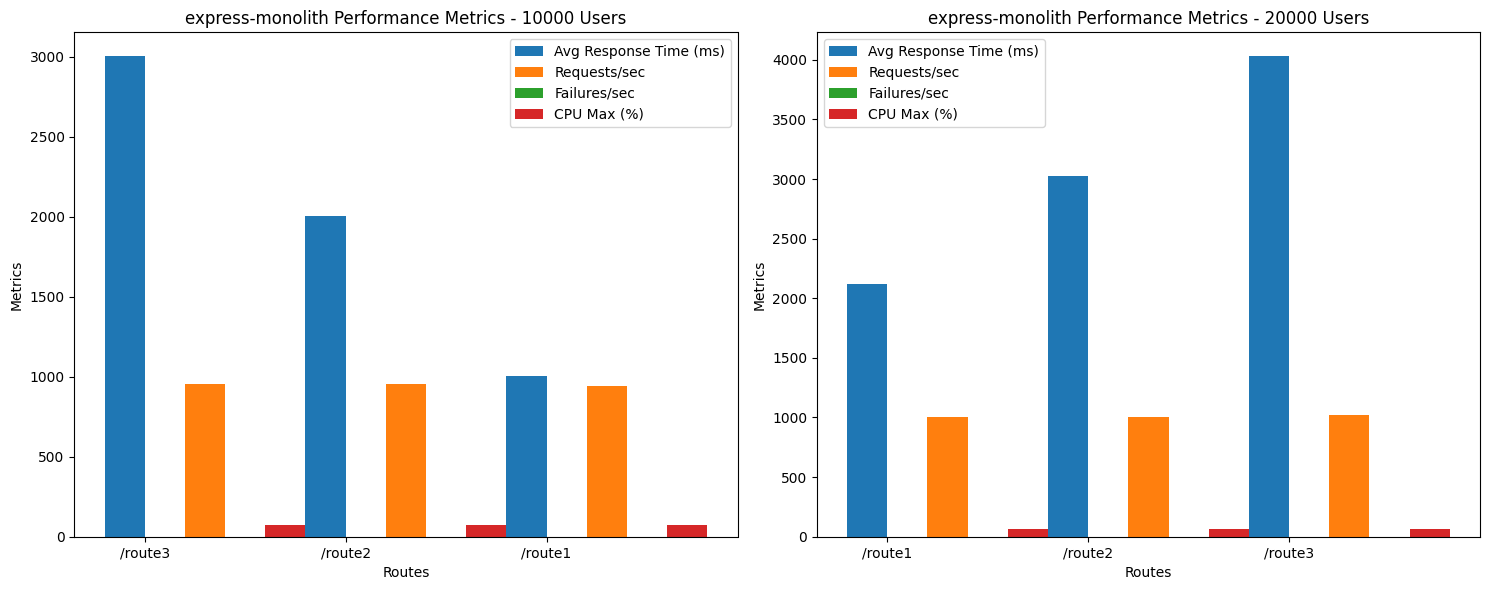

In [22]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create charts for express-monolith service
create_service_chart(df, "express-monolith", 10000, axes[0])
create_service_chart(df, "express-monolith", 20000, axes[1])

plt.tight_layout()
plt.show()

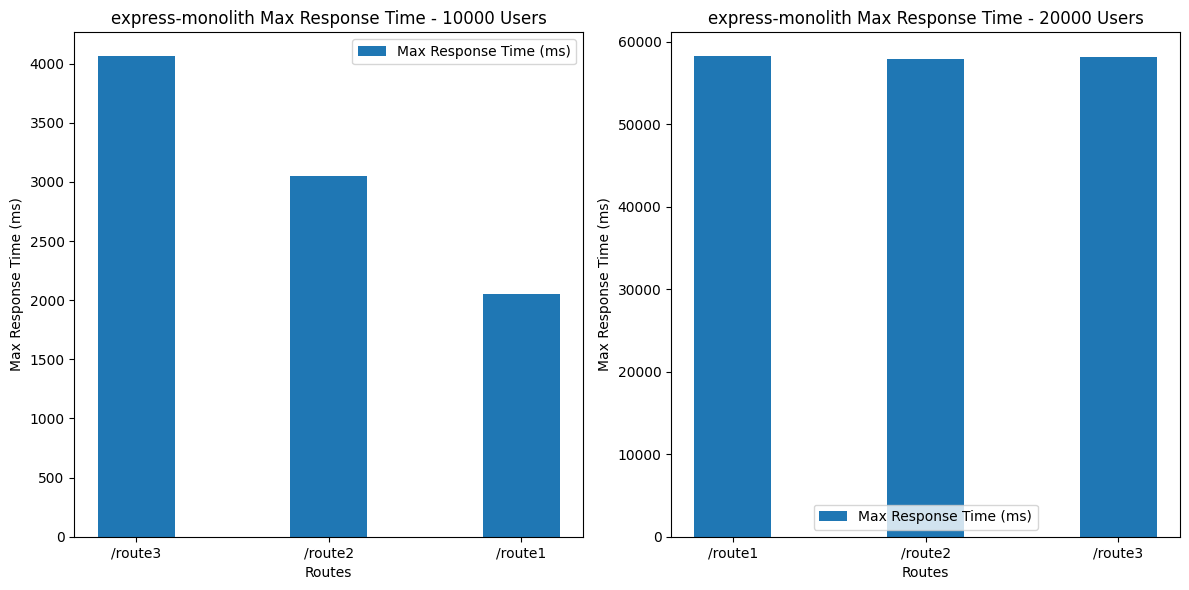

In [26]:
# Create subplots for maximum response time charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create charts for express-monolith service
create_max_response_chart(df, "express-monolith", 10000, axes[0])
create_max_response_chart(df, "express-monolith", 20000, axes[1])

plt.tight_layout()
plt.show()

# FastAPI Monolith Metrics

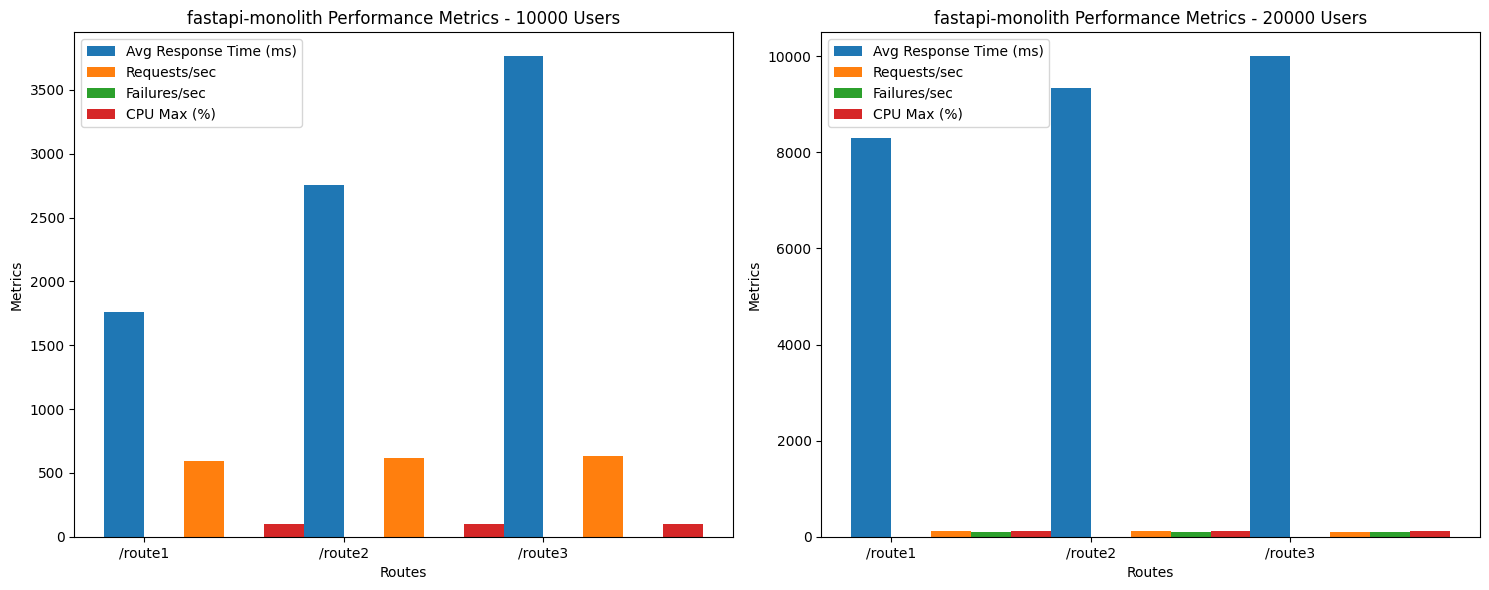

In [27]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create charts for fastapi-monolith service
create_service_chart(df, "fastapi-monolith", 10000, axes[0])
create_service_chart(df, "fastapi-monolith", 20000, axes[1])

plt.tight_layout()
plt.show()

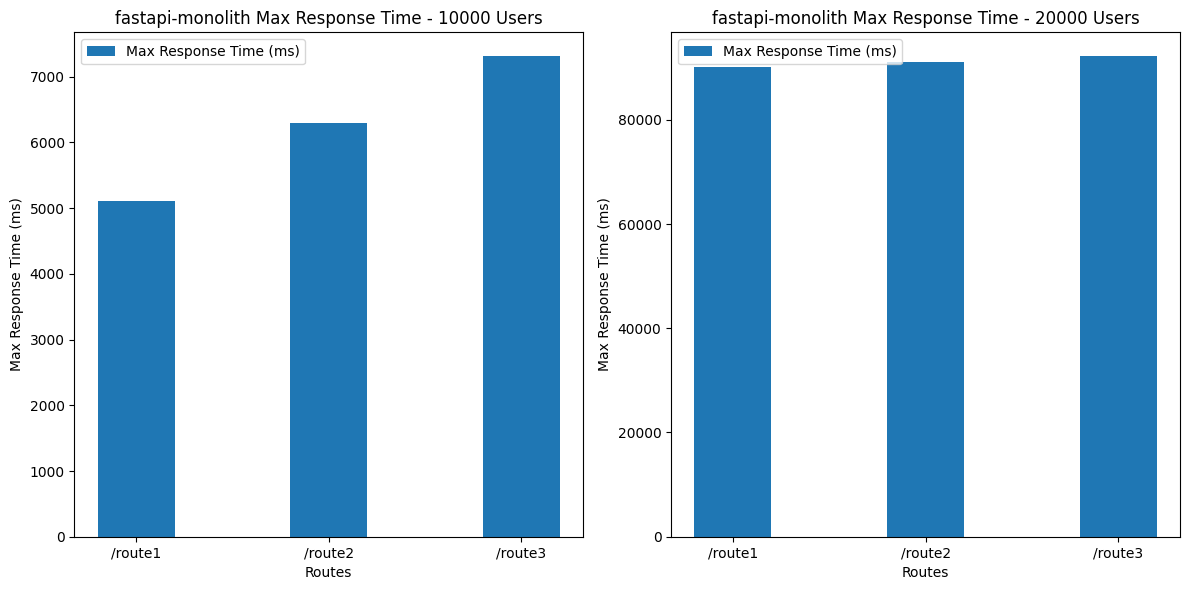

In [28]:
# Create subplots for maximum response time charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create charts for fastapi-monolith service
create_max_response_chart(df, "fastapi-monolith", 10000, axes[0])
create_max_response_chart(df, "fastapi-monolith", 20000, axes[1])

plt.tight_layout()
plt.show()

# Flask Monolith Metrics

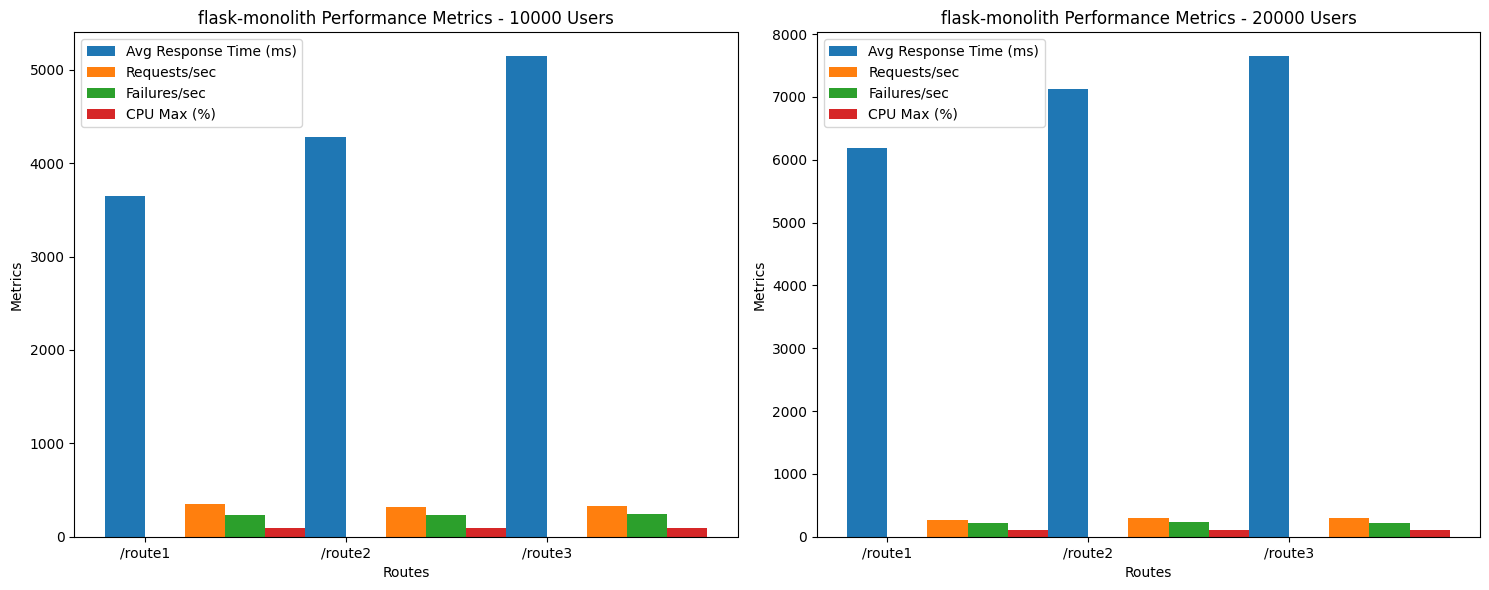

In [29]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create charts for flask-monolith service
create_service_chart(df, "flask-monolith", 10000, axes[0])
create_service_chart(df, "flask-monolith", 20000, axes[1])

plt.tight_layout()
plt.show()

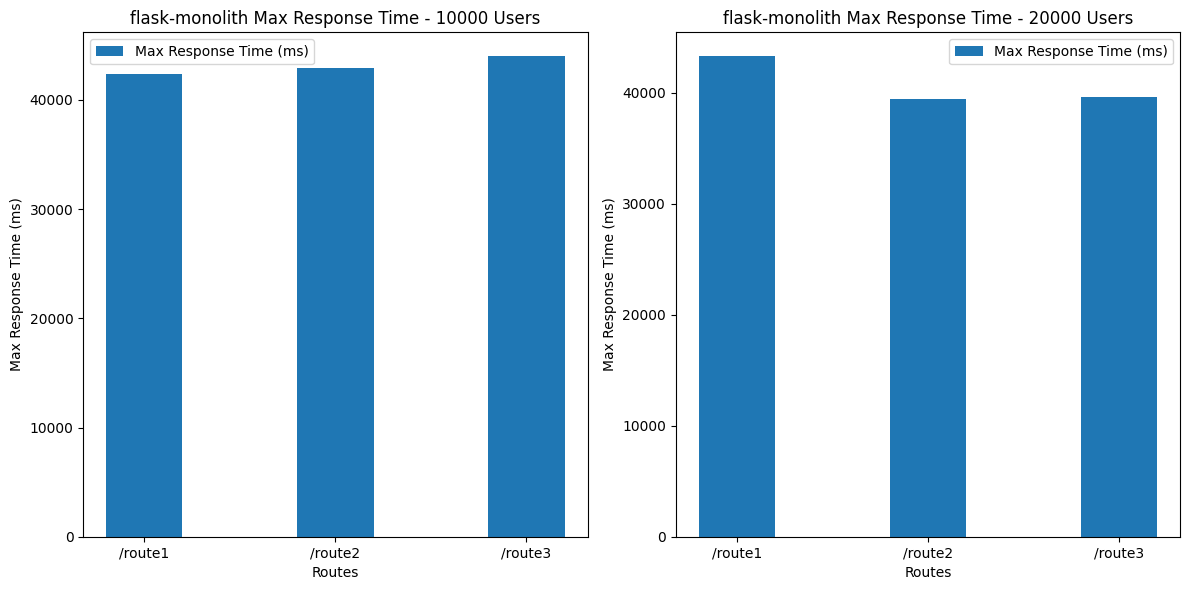

In [30]:
# Create subplots for maximum response time charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create charts for flask-monolith service
create_max_response_chart(df, "flask-monolith", 10000, axes[0])
create_max_response_chart(df, "flask-monolith", 20000, axes[1])

plt.tight_layout()
plt.show()

# Monolith vs Microservices Metrics Comparison

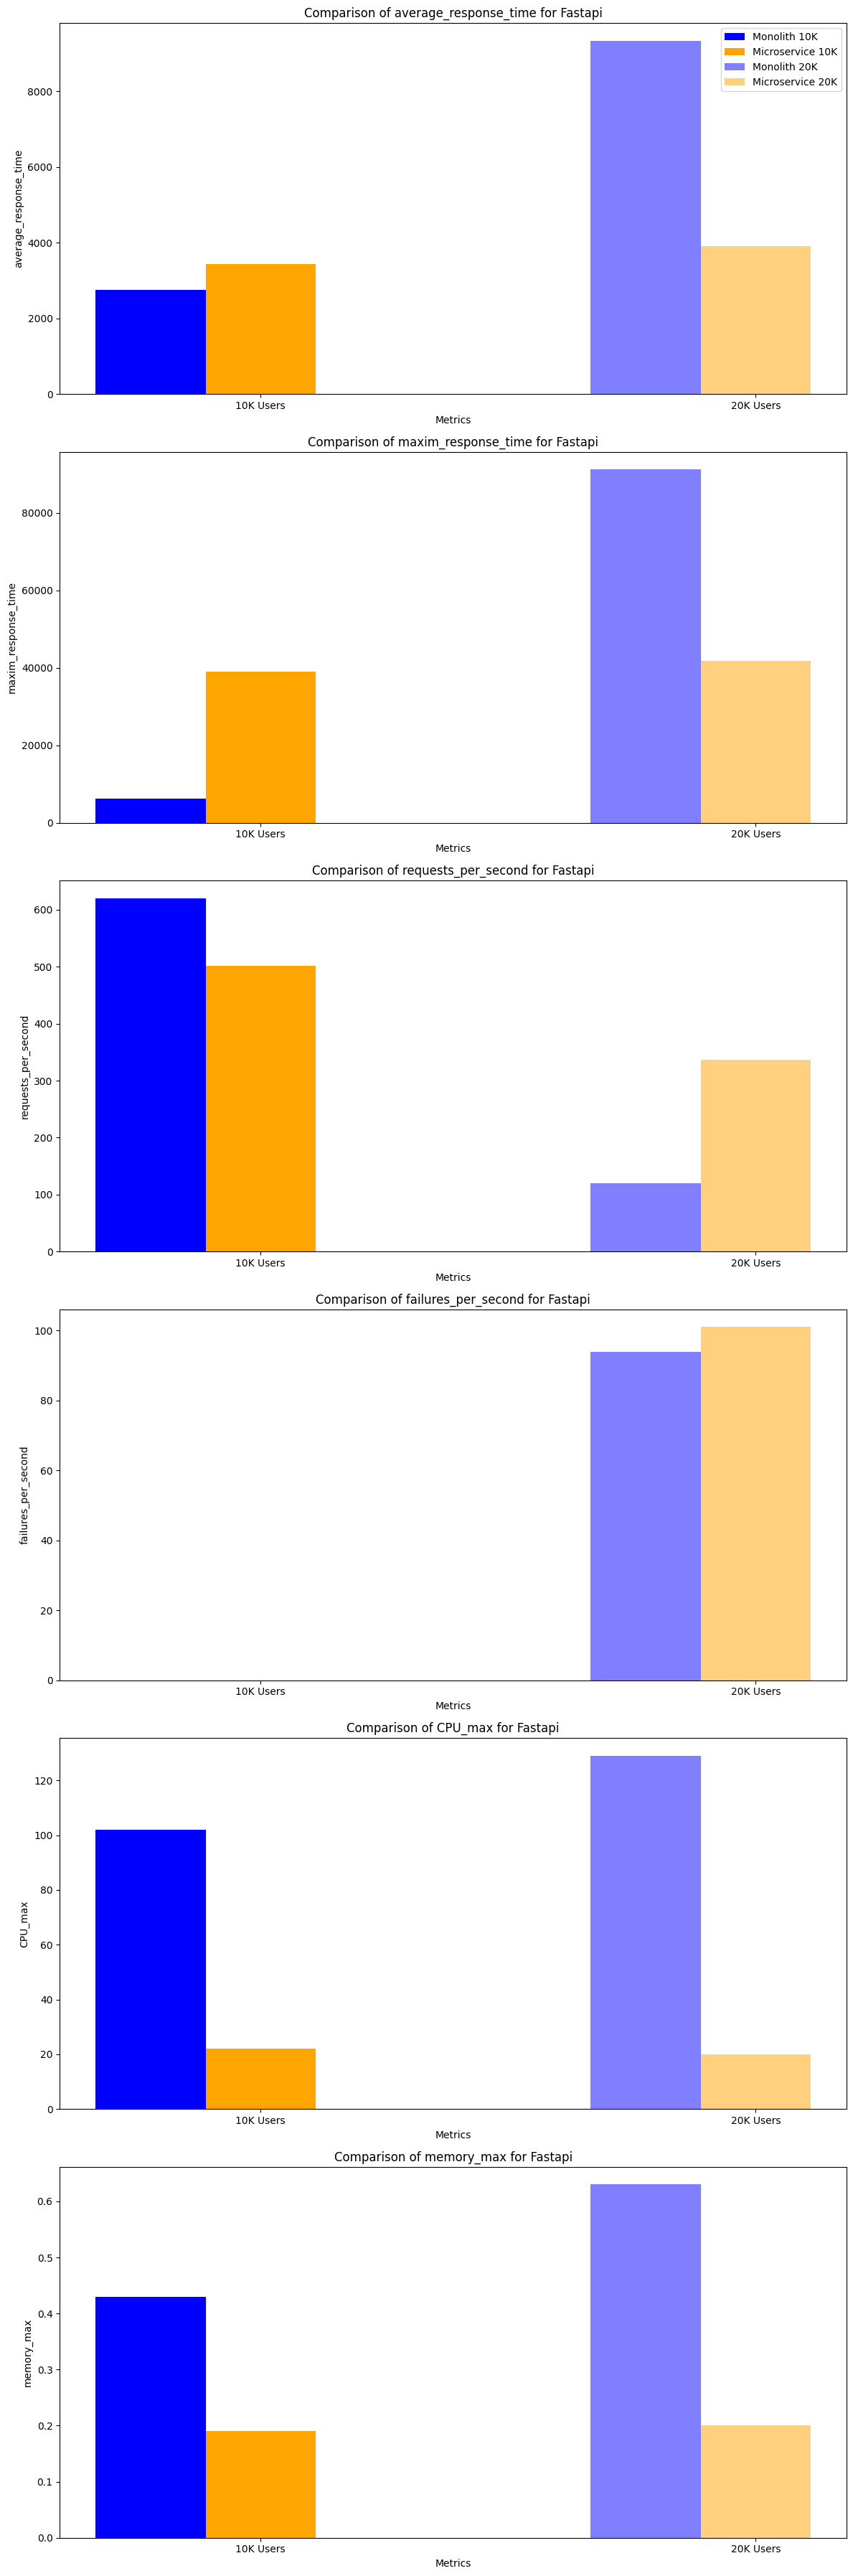

In [52]:
def create_service_comparison_charts(df, service_name, route):
    # Metrics for comparison
    metrics = ['average_response_time', 'maxim_response_time', 'requests_per_second', 'failures_per_second', 'CPU_max', 'memory_max']

    # Bar width and spacing
    bar_width = 0.2
    group_spacing = 0.5

    # Create subplots for each metric
    fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(12, 6 * len(metrics)))

    # Plot data for each metric
    for i, metric in enumerate(metrics):
        ax = axes[i]

        # Positions for bars: one group of four bars for the current metric
        positions = [0, bar_width, bar_width * 2 + group_spacing, bar_width * 3 + group_spacing]

        # Data for 10K and 20K users for the current metric
        monolith_10k = df[(df['service'] == f'{service_name}-monolith') & (df['route'] == route) & (df['total_users'] == 10000)]
        monolith_20k = df[(df['service'] == f'{service_name}-monolith') & (df['route'] == route) & (df['total_users'] == 20000)]
        microservice_10k = df[(df['service'] == f'microservice-{service_name}') & (df['route'] == route) & (df['total_users'] == 10000)]
        microservice_20k = df[(df['service'] == f'microservice-{service_name}') & (df['route'] == route) & (df['total_users'] == 20000)]

        # Plotting data
        ax.bar(positions[0], monolith_10k[metric].values[0] if not monolith_10k.empty else 0, width=bar_width, label='Monolith 10K', color='blue')
        ax.bar(positions[1], microservice_10k[metric].values[0] if not microservice_10k.empty else 0, width=bar_width, label='Microservice 10K', color='orange')
        ax.bar(positions[2], monolith_20k[metric].values[0] if not monolith_20k.empty else 0, width=bar_width, label='Monolith 20K', color='blue', alpha=0.5)
        ax.bar(positions[3], microservice_20k[metric].values[0] if not microservice_20k.empty else 0, width=bar_width, label='Microservice 20K', color='orange', alpha=0.5)

        # Set labels and titles
        ax.set_xlabel('Metrics')
        ax.set_ylabel(metric)
        ax.set_title(f'Comparison of {metric} for {service_name.capitalize()}')
        ax.set_xticks([positions[1], positions[3]])  # Position x-ticks in the middle of each group
        ax.set_xticklabels(['10K Users', '20K Users'], ha='center')
        if i == 0:  # Only add legend to the first plot for clarity
            ax.legend()

    plt.tight_layout()
    plt.show()


create_service_comparison_charts(df, "fastapi", "/route2")


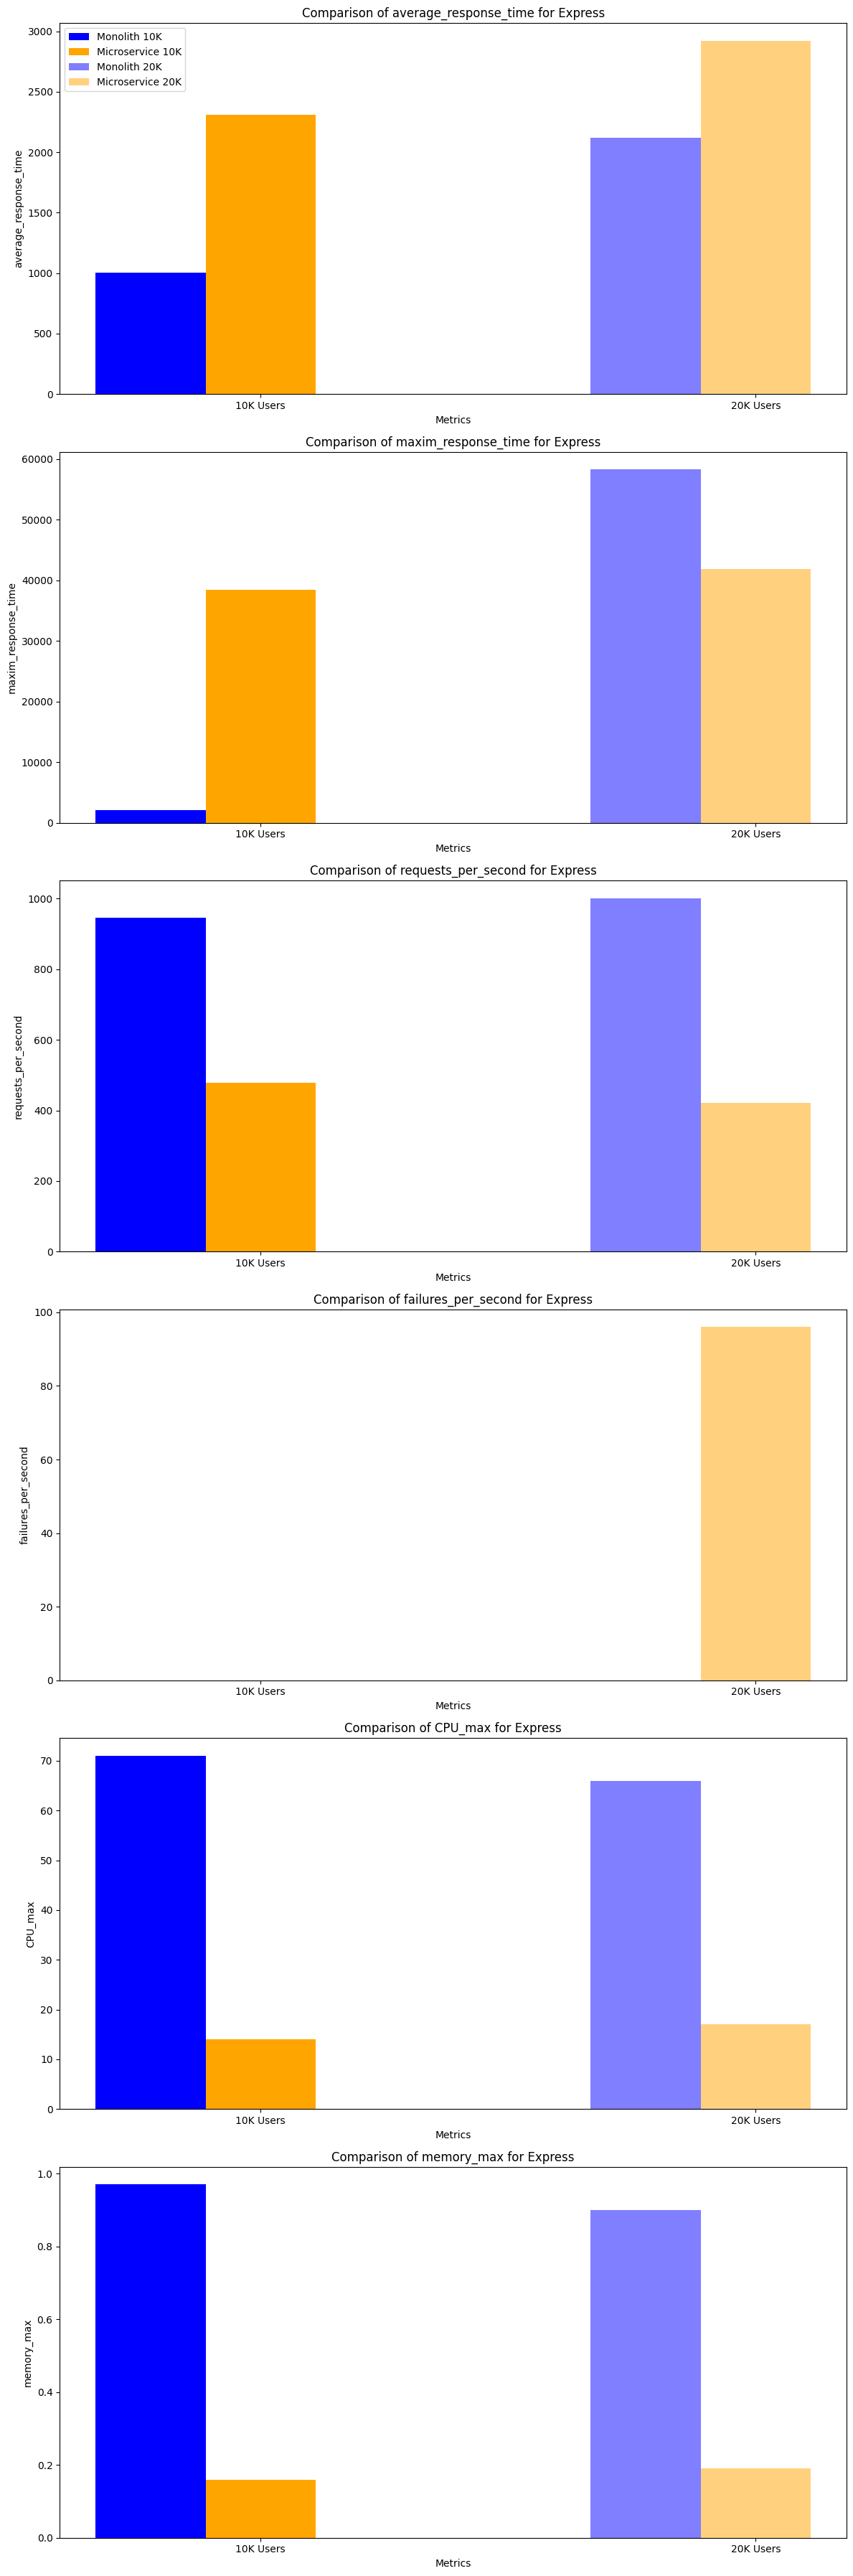

In [53]:
create_service_comparison_charts(df, "express", "/route1")


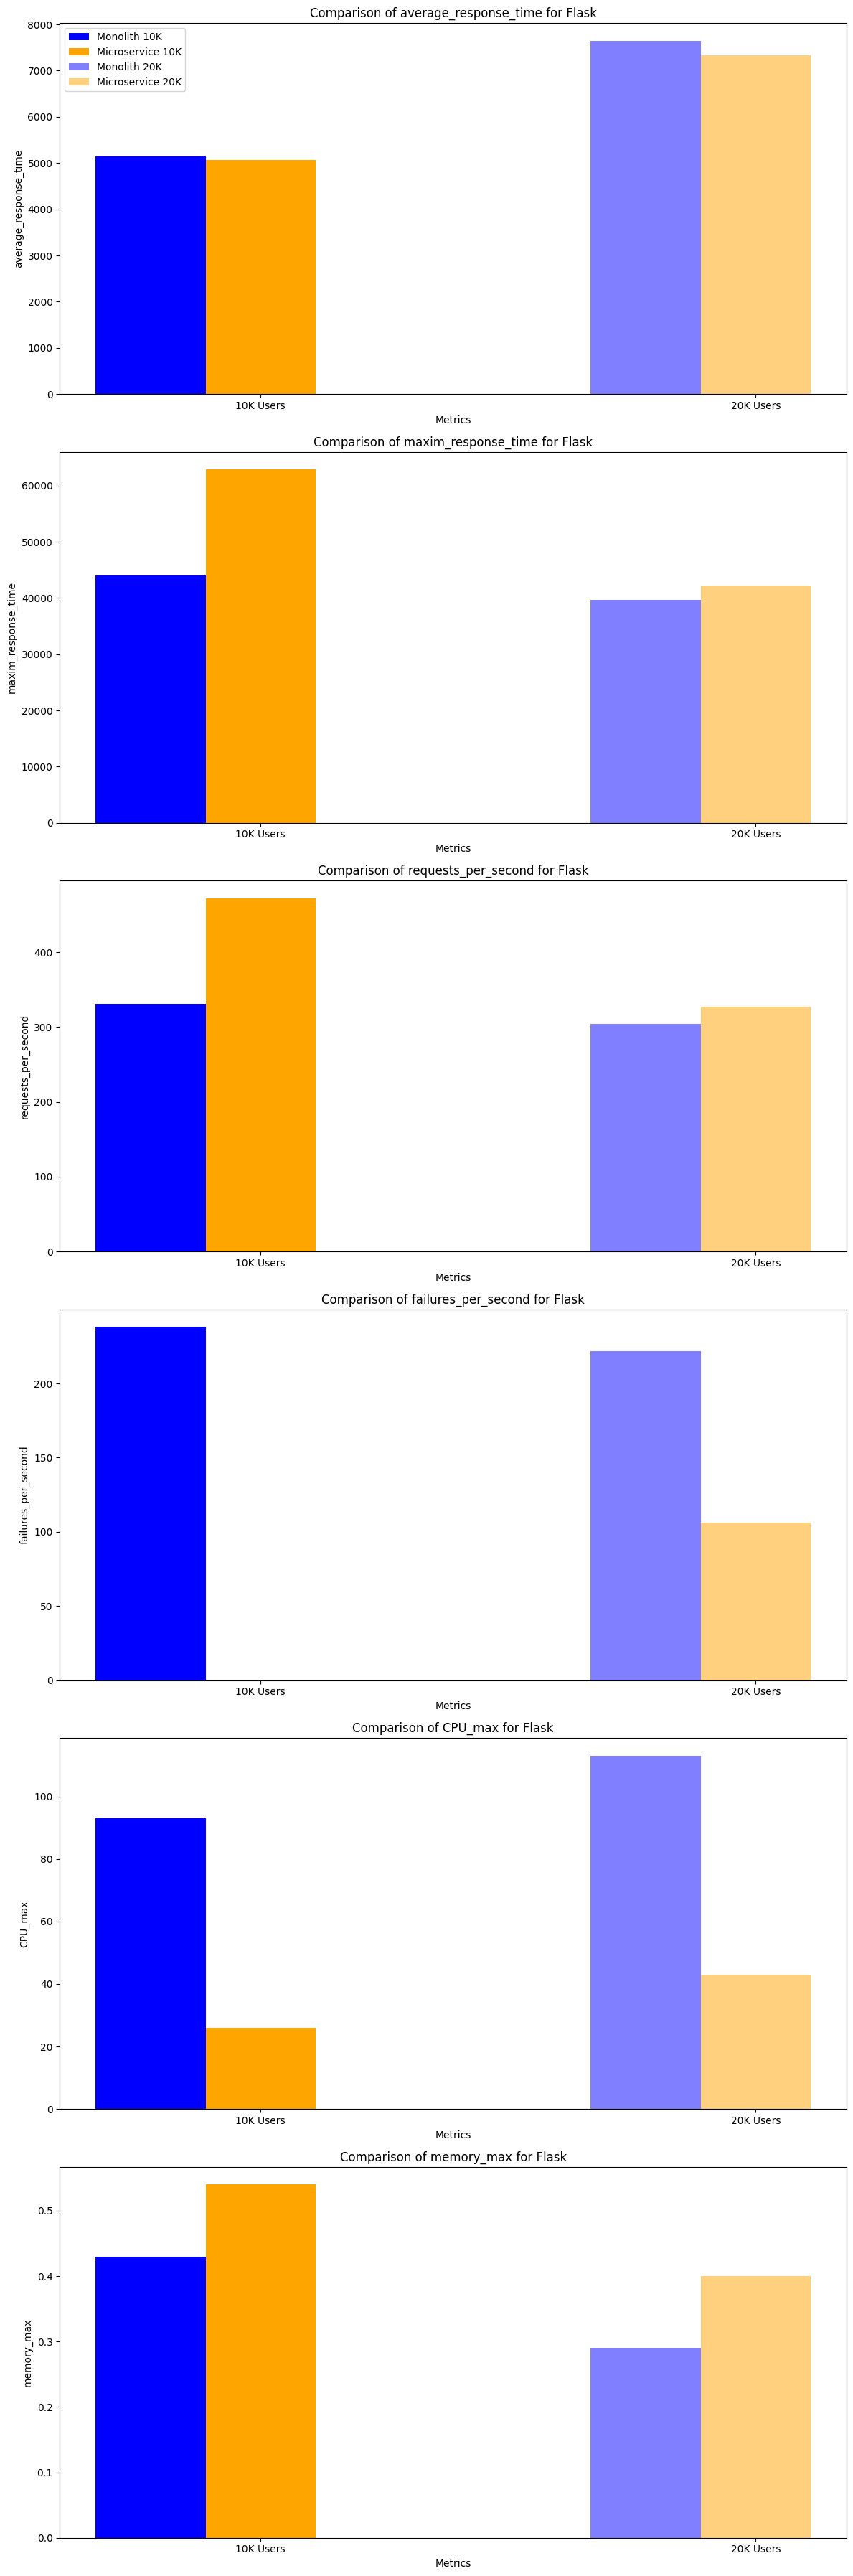

In [54]:
create_service_comparison_charts(df, "flask", "/route3")
